In [5]:
! python --version

zsh:1: command not found: python


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from sklearn.metrics import confusion_matrix
import seaborn as sns

Found 5556 images belonging to 80 classes.
Found 1344 images belonging to 80 classes.
Class names: ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 956s 5s/step - accuracy: 0.1879 - loss: 4.6326 - val_accuracy: 0.3363 - val_loss: 3.0976
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 938s 5s/step - accuracy: 0.6256 - loss: 1.4053 - val_accuracy: 0.4286 - val_loss: 2.8983
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 949s 5s/step - accuracy: 0.7368 - loss: 0.9320 - val_accuracy: 0.4516 - val_loss: 2.9316
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 955s 5s/step - accuracy: 0.8143 - loss: 0.6216 - val_accuracy: 0.4948 - val_loss: 2.8961
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 956s 5s/step - accuracy: 0.8599 - loss: 0.4919 - val_accuracy: 0.4725 - val_loss: 2.9694
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 955s 5s/step - accuracy: 0.8653 - loss: 0.4478 - val_accuracy: 0.4769 - val_loss: 3.0958
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 955s 5s/step - accuracy: 0.8964 - loss: 0.3508 - val_accuracy: 0.4955 - val_loss: 3.1301
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 952s 5s/step - accuracy: 0.8988 - loss: 0.3273 - val_accuracy: 0.505

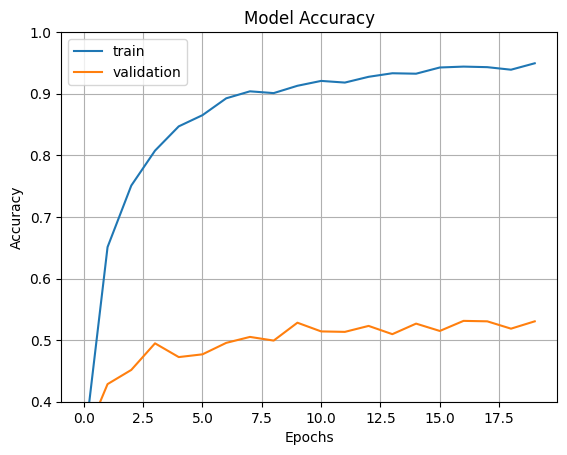

42/42 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step


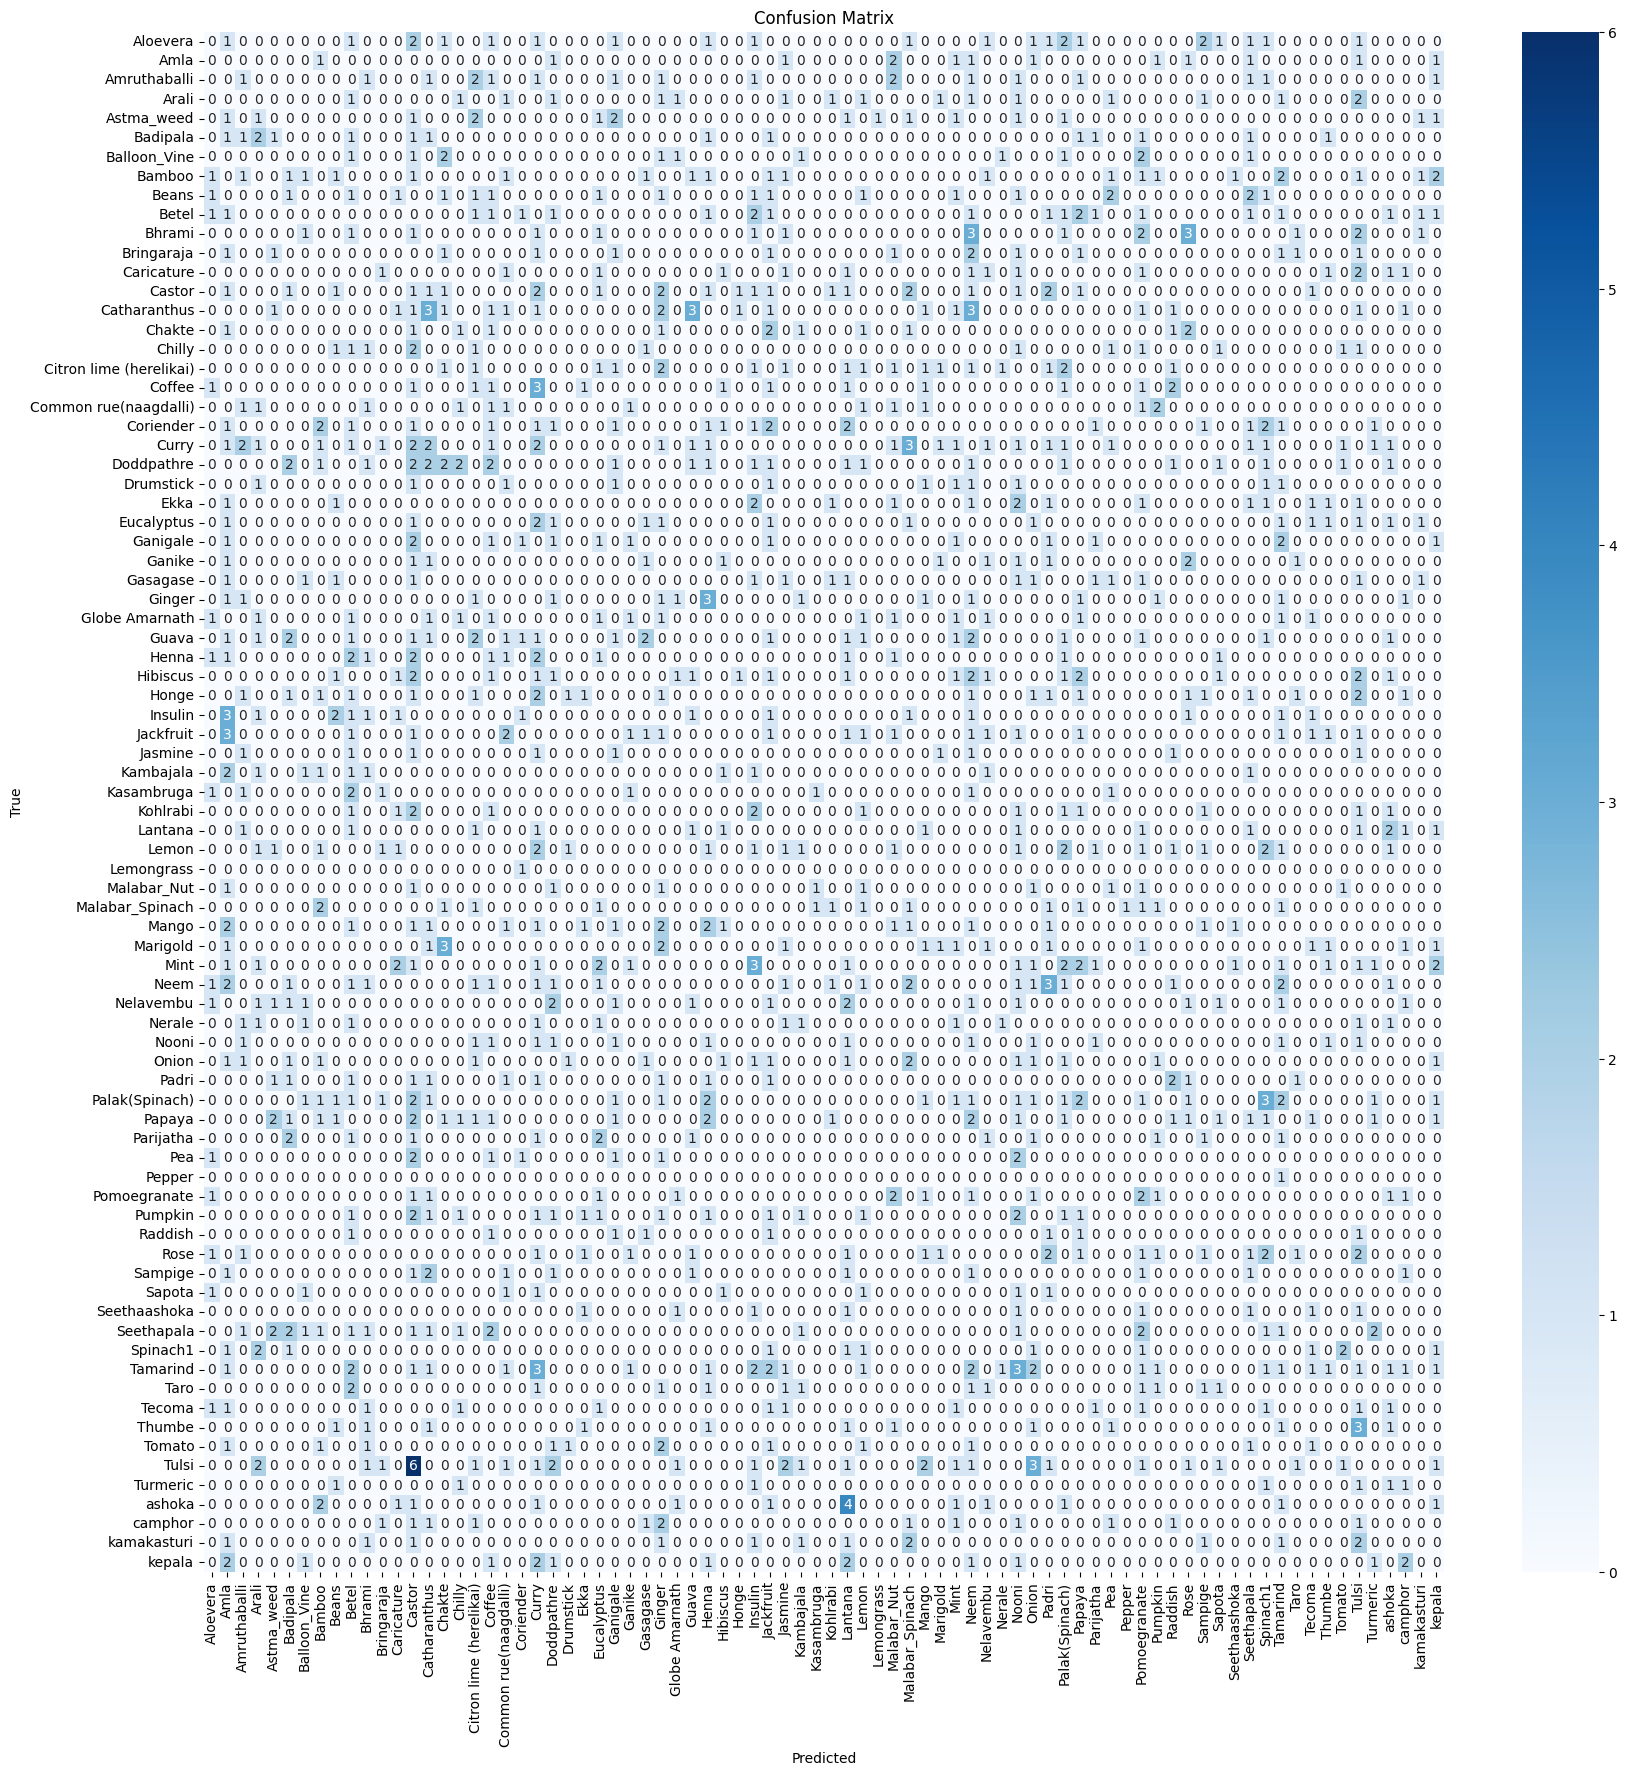

In [2]:


# Ensure that truncated images are loaded
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Parameters
img_height = 224  # VGG16 requires 224x224 images
img_width = 224
batch_size = 32
directory = r"/Users/shauryasharma/Downloads/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset"
    # Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Add validation split here
)

# Load the training dataset with augmentation
train_ds = datagen.flow_from_directory(
    directory,
    subset="training",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Load the validation dataset without augmentation
validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_ds = validation_datagen.flow_from_directory(
    directory,
    subset="validation",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Display some information about the loaded dataset
class_names = list(train_ds.class_indices.keys())
print("Class names:", class_names)

# Define the model
vgg16_model = Sequential()

# Load the pretrained VGG16 model
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet',
)

# Freeze the layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pretrained model to the sequential model
vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(len(class_names), activation='softmax'))

vgg16_model.summary()
vgg16_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = vgg16_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

# Plotting the training history
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.4, 1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Generate predictions and plot the confusion matrix
Y_pred = vgg16_model.predict(validation_ds)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(validation_ds.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [3]:
vgg16_model.save("/Users/shauryasharma/Desktop/Saved Models/VGG16AUG.keras")